In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../../dnyan/Datasets/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


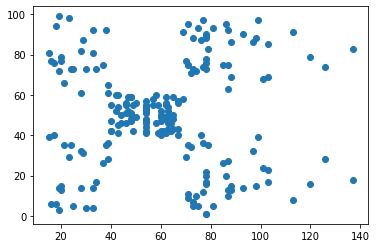

In [6]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])

In [7]:
from sklearn.cluster import KMeans

In [8]:
model= KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [9]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [10]:
cluster_number= model.predict(X)

In [11]:
cluster_number

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [12]:
len(cluster_number)

200

In [13]:
len(X)

200

In [14]:
c0=X[cluster_number==0]
c1=X[cluster_number==1]
c2=X[cluster_number==2]
c3=X[cluster_number==3]
c4=X[cluster_number==4]


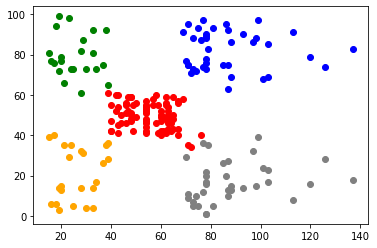

In [15]:
plt.scatter(c0['Annual Income (k$)'],c0['Spending Score (1-100)'],c='red')
plt.scatter(c1['Annual Income (k$)'],c1['Spending Score (1-100)'],c='blue')
plt.scatter(c2['Annual Income (k$)'],c2['Spending Score (1-100)'],c='green')
plt.scatter(c3['Annual Income (k$)'],c3['Spending Score (1-100)'],c='gray')
plt.scatter(c4['Annual Income (k$)'],c4['Spending Score (1-100)'],c='orange')


In [16]:
model.inertia_

44448.45544793369

In [17]:
#calculate WCSS (within cluster sum of sq.)
model= KMeans(n_clusters= 1)
model.fit(X)
model.inertia_

C:\Users\dnyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


269981.28000000014

In [18]:
WCSS= []
for i in range(1,11):
    model= KMeans(n_clusters= i)
    model.fit(X)
    model.inertia_
    WCSS.append(model.inertia_)

C:\Users\dnyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
WCSS

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25018.576334776328,
 22813.907850185522,
 19787.67055496685]

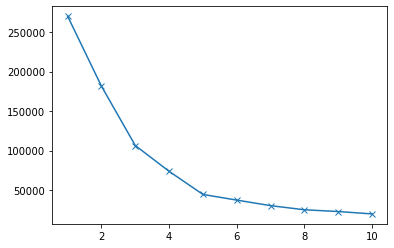

In [20]:
# to find elbow point to decide number of clusters
plt.plot(range(1,11),WCSS,marker= 'x')